<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/dz6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

## 1. Предварительная обработка данных
Загрузка данных и первичный анализ

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv(url, header=None, names=columns)

# Первичный анализ
print(iris.head())
print(iris.describe())
print(iris.info())
print(iris.isnull().sum())  # Проверка на пропуски


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeInd

Нормализация/стандартизация данных

In [36]:
from sklearn.preprocessing import StandardScaler

# Разделение признаков и целевой переменной
X = iris.drop("species", axis=1)
y = iris["species"]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Разделение данных на тренировочный и тестовый наборы

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


2. Обучение модели
Обучение модели логистической регрессии без регуляризации

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Модель без регуляризации (используем очень большое значение C)
model_no_reg = LogisticRegression(penalty='l2', C=1e12, max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Оценка качества
y_train_pred_no_reg = model_no_reg.predict(X_train)
y_test_pred_no_reg = model_no_reg.predict(X_test)

print("Accuracy без регуляризации (train):", accuracy_score(y_train, y_train_pred_no_reg))
print("Accuracy без регуляризации (test):", accuracy_score(y_test, y_test_pred_no_reg))


Accuracy без регуляризации (train): 0.9833333333333333
Accuracy без регуляризации (test): 1.0


Обучение модели с L1- и L2-регуляризацией

In [48]:
from sklearn.model_selection import GridSearchCV

# Подбор параметров для L1-регуляризации
param_grid_l1 = {'C': [0.01, 0.1, 1, 10, 100]}
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
grid_l1 = GridSearchCV(model_l1, param_grid_l1, cv=5, error_score='raise')
grid_l1.fit(X_train, y_train)

print("Оптимальный параметр C для L1:", grid_l1.best_params_)
print("Accuracy L1 (train):", accuracy_score(y_train, grid_l1.predict(X_train)))
print("Accuracy L1 (test):", accuracy_score(y_test, grid_l1.predict(X_test)))

# Подбор параметров для L2-регуляризации
param_grid_l2 = {'C': [0.01, 0.1, 1, 10, 100]}
model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
grid_l2 = GridSearchCV(model_l2, param_grid_l2, cv=5, error_score='raise')
grid_l2.fit(X_train, y_train)

print("Оптимальный параметр C для L2:", grid_l2.best_params_)
print("Accuracy L2 (train):", accuracy_score(y_train, grid_l2.predict(X_train)))
print("Accuracy L2 (test):", accuracy_score(y_test, grid_l2.predict(X_test)))


Оптимальный параметр C для L1: {'C': 10}
Accuracy L1 (train): 0.9666666666666667
Accuracy L1 (test): 0.9333333333333333
Оптимальный параметр C для L2: {'C': 10}
Accuracy L2 (train): 0.975
Accuracy L2 (test): 1.0


3. Анализ результатов
Сравнение качества моделей

In [49]:
print("Сравнение качества моделей:")
print("Без регуляризации: ", accuracy_score(y_test, y_test_pred_no_reg))
print("С L1 регуляризацией: ", accuracy_score(y_test, grid_l1.predict(X_test)))
print("С L2 регуляризацией: ", accuracy_score(y_test, grid_l2.predict(X_test)))


Сравнение качества моделей:
Без регуляризации:  1.0
С L1 регуляризацией:  0.9333333333333333
С L2 регуляризацией:  1.0


Построение графиков кривых обучения

Classes in training set for No Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Classes in training set for L1 Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Classes in training set for L2 Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


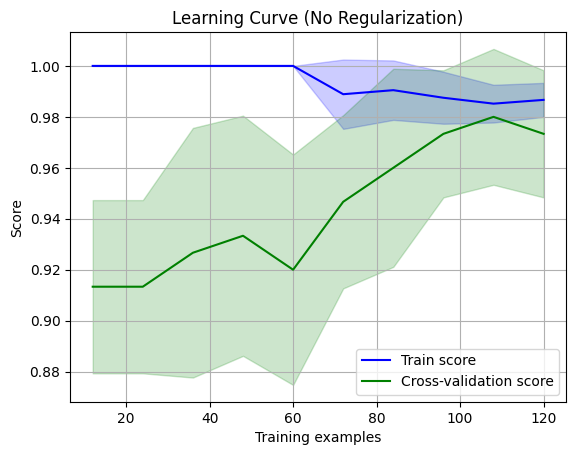

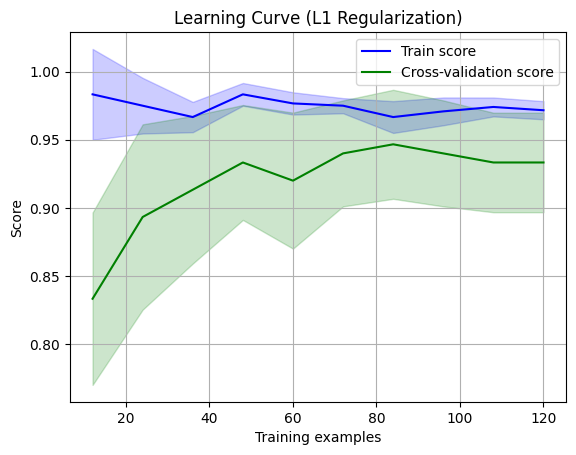

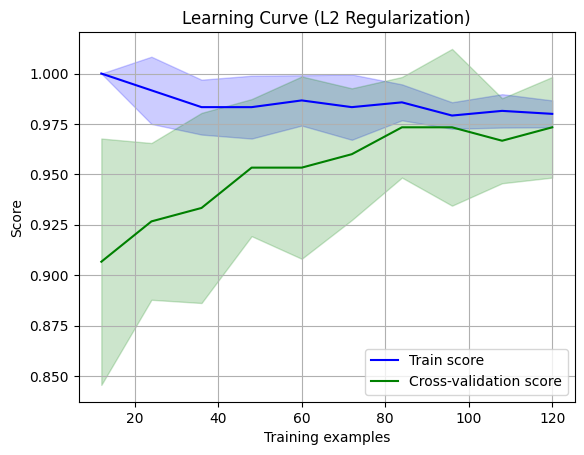

In [52]:
from sklearn.model_selection import learning_curve, StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, title):
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)  # Используем StratifiedShuffleSplit
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10, 100), cv=cv
    )

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)  # Стандартное отклонение для тренировочных данных
    test_scores_std = test_scores.std(axis=1)    # Стандартное отклонение для тестовых данных

    plt.figure()
    # Плотим средние значения
    plt.plot(train_sizes, train_scores_mean, label='Train score', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')

    # Заполняем область вокруг средних значений для дисперсии
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     color='blue', alpha=0.2)
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     color='green', alpha=0.2)

    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Проверка классов в обучающей выборке
print("Classes in training set for No Regularization:", np.unique(y_train))
print("Classes in training set for L1 Regularization:", np.unique(y_train))
print("Classes in training set for L2 Regularization:", np.unique(y_train))

# Построение кривой обучения для моделей
plot_learning_curve(model_no_reg, 'Learning Curve (No Regularization)')
plot_learning_curve(grid_l1.best_estimator_, 'Learning Curve (L1 Regularization)')
plot_learning_curve(grid_l2.best_estimator_, 'Learning Curve (L2 Regularization)')





Модель: Без регуляризации
Accuracy на тренировочных данных: 0.9809523809523809
Accuracy на тестовых данных: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

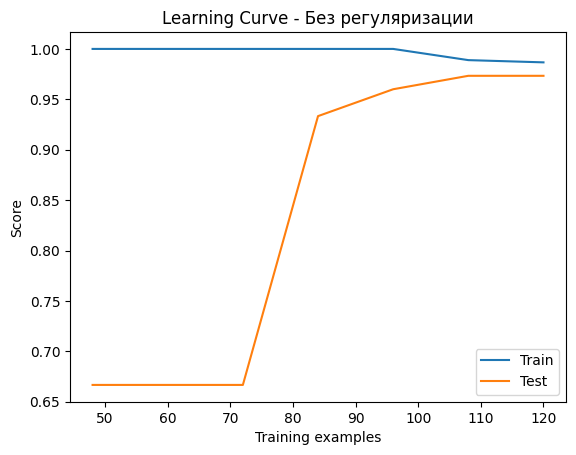

Модель: L1
Accuracy на тренировочных данных: 0.9809523809523809
Accuracy на тестовых данных: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

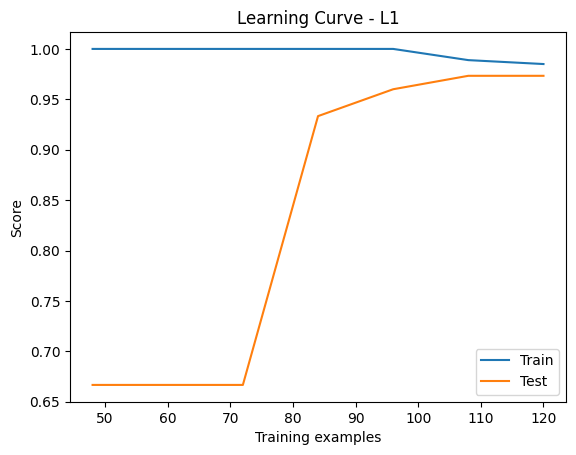

Модель: L2
Accuracy на тренировочных данных: 0.9619047619047619
Accuracy на тестовых данных: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

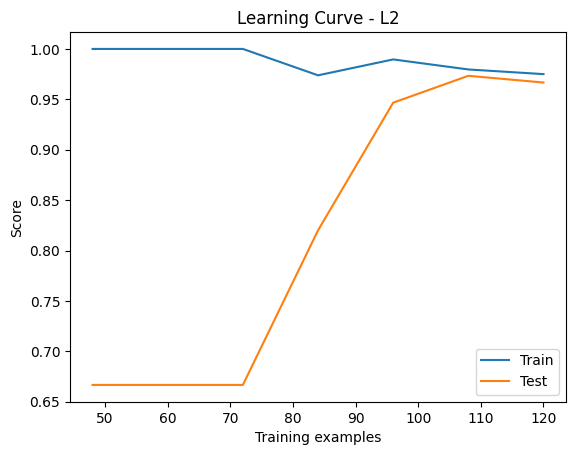

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Предварительная обработка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv(url, header=None, names=columns)
X = iris.drop('species', axis=1)
y = iris['species']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# 2. Обучение модели
# Модель без регуляризации
model_no_reg = LogisticRegression(penalty=None, solver='saga', max_iter=10000).fit(X_train, y_train)


# Модель с L1-регуляризацией
param_grid_l1 = {'C': np.logspace(-4, 4, 20)}
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
grid_search_l1 = GridSearchCV(model_l1, param_grid_l1, cv=5).fit(X_train, y_train)
best_model_l1 = grid_search_l1.best_estimator_

# Модель с L2-регуляризацией
param_grid_l2 = {'C': np.logspace(-4, 4, 20)}
model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
grid_search_l2 = GridSearchCV(model_l2, param_grid_l2, cv=5).fit(X_train, y_train)
best_model_l2 = grid_search_l2.best_estimator_



# 3. Анализ результатов
models = {'Без регуляризации': model_no_reg, 'L1': best_model_l1, 'L2': best_model_l2}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"Модель: {name}")
    print(f"Accuracy на тренировочных данных: {accuracy_score(y_train, y_train_pred)}")
    print(f"Accuracy на тестовых данных: {accuracy_score(y_test, y_test_pred)}")
    print(classification_report(y_test, y_test_pred))

    # Кривые обучения
    train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curve - {name}')
    plt.legend()
    plt.show()




# 4. Отчёт (в текстовом формате ниже)
